In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic = titanic[['Pclass', 'Sex', 'Age', 'Survived']].dropna()
titanic

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
885,3,female,39.0,0
886,2,male,27.0,0
887,1,female,19.0,1
889,1,male,26.0,1


In [6]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})  # Encode gender
X = titanic[['Pclass', 'Sex', 'Age']]  # Features
y = titanic['Survived']  # Target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [9]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7482517482517482


In [11]:
new_passenger = [[1, 1, 25]]  # Example: First Class, Female, Age 25
predicted_survival = "Survived" if model.predict(new_passenger)[0] == 1 else "Did not survive"
print("Prediction:", predicted_survival)


Prediction: Survived


C:\Users\peddi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


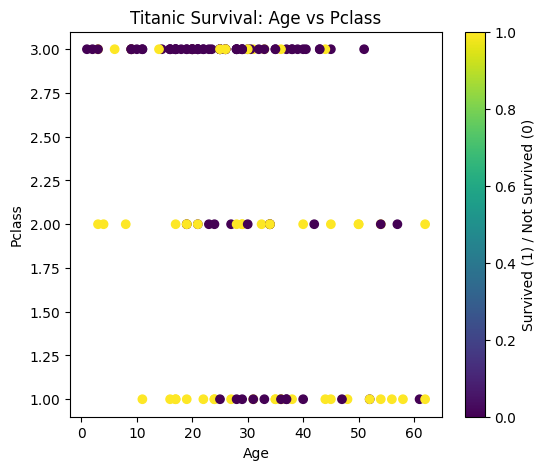

In [15]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(6, 5))

# Plot the test data
scatter = plt.scatter(X_test['Age'], X_test['Pclass'], c=y_test )
 
plt.title("Titanic Survival: Age vs Pclass")
plt.xlabel("Age")
plt.ylabel("Pclass")
 
plt.colorbar(scatter, label="Survived (1) / Not Survived (0)")
 
plt.show()
